## Exercici 1
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_flights = pd.read_csv("DelayedFlights.csv")
df_flights = df_flights.sample(200, random_state = 0)

flights_int = df_flights.loc[:,(df_flights.dtypes=='int').values]
flights_float = df_flights.loc[:,(df_flights.dtypes=='float').values]
df_flights = pd.concat([flights_int, flights_float], axis=1)

count_nan_in_df = df_flights.isnull().sum()
print(count_nan_in_df)

Unnamed: 0            0
Year                  0
Month                 0
DayofMonth            0
DayOfWeek             0
CRSDepTime            0
CRSArrTime            0
FlightNum             0
Distance              0
Cancelled             0
Diverted              0
DepTime               0
ArrTime               1
ActualElapsedTime     1
CRSElapsedTime        0
AirTime               1
ArrDelay              1
DepDelay              0
TaxiIn                1
TaxiOut               0
CarrierDelay         82
WeatherDelay         82
NASDelay             82
SecurityDelay        82
LateAircraftDelay    82
dtype: int64


In [156]:
df_flights = df_flights.dropna(subset=['ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'TaxiIn', 'TaxiOut'])
count_nan_in_df = df_flights.isnull().sum()
print (count_nan_in_df)

Unnamed: 0            0
Year                  0
Month                 0
DayofMonth            0
DayOfWeek             0
CRSDepTime            0
CRSArrTime            0
FlightNum             0
Distance              0
Cancelled             0
Diverted              0
DepTime               0
ArrTime               0
ActualElapsedTime     0
CRSElapsedTime        0
AirTime               0
ArrDelay              0
DepDelay              0
TaxiIn                0
TaxiOut               0
CarrierDelay         81
WeatherDelay         81
NASDelay             81
SecurityDelay        81
LateAircraftDelay    81
dtype: int64


In [157]:
df_flights = df_flights.fillna(0)
count_nan_in_df = df_flights.isnull().sum()
print (count_nan_in_df)

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
FlightNum            0
Distance             0
Cancelled            0
Diverted             0
DepTime              0
ArrTime              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [158]:
# Separar dataset en features y labels
y = df_flights.ArrDelay
X = df_flights.drop('ArrDelay', axis=1)

**Linear Regression**

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


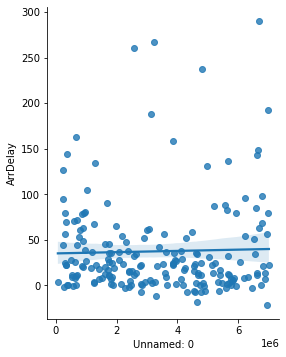

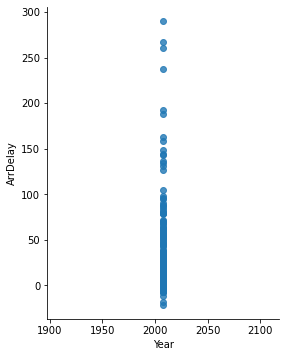

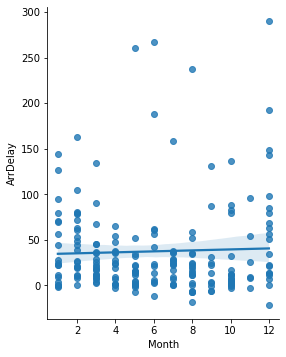

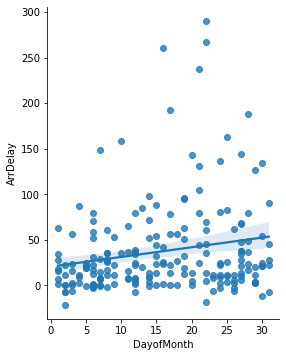

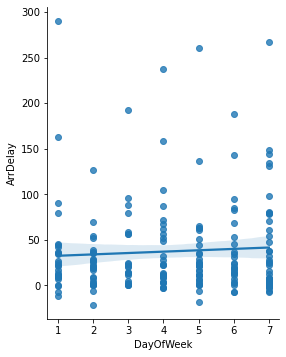

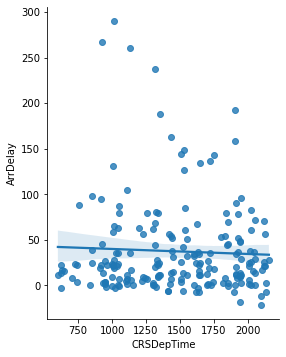

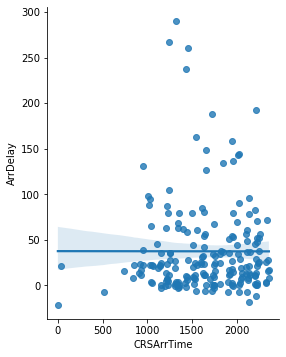

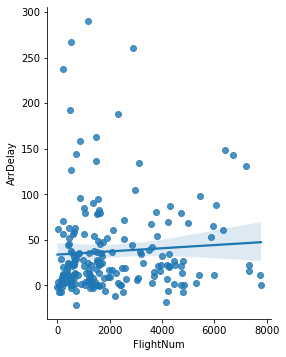

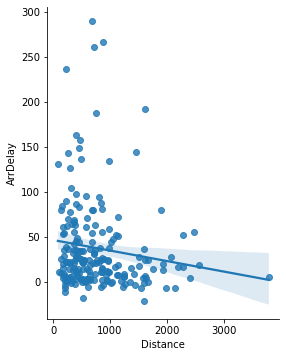

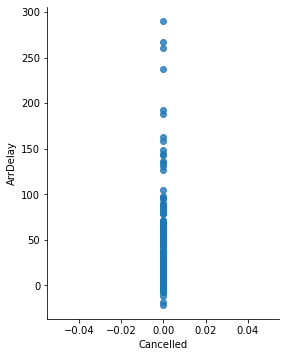

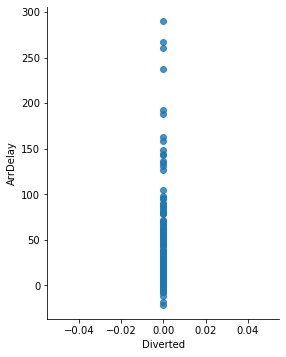

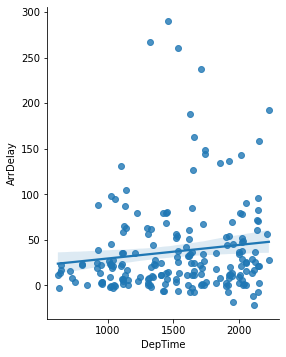

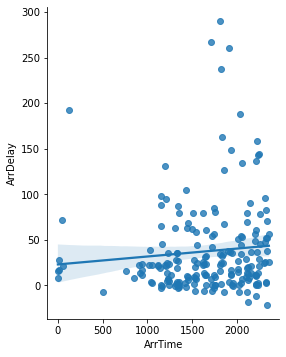

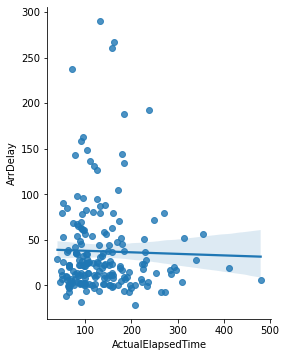

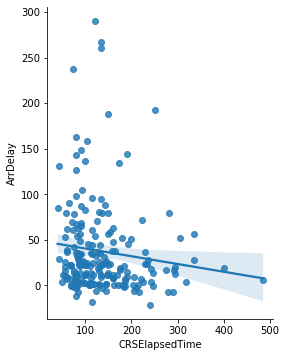

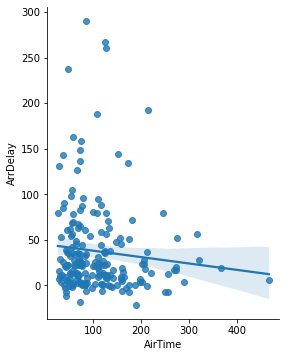

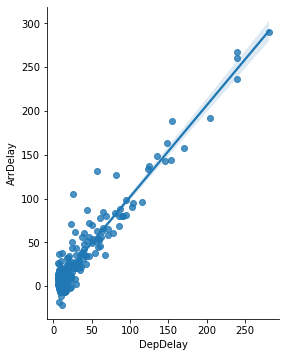

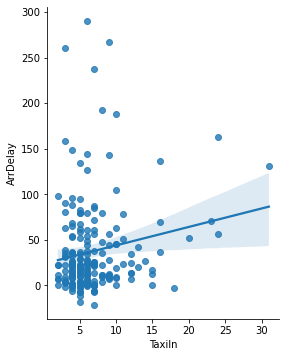

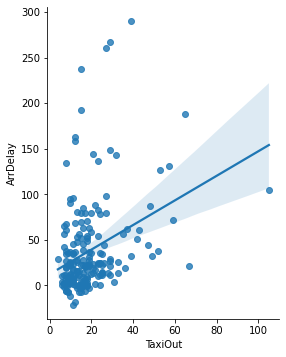

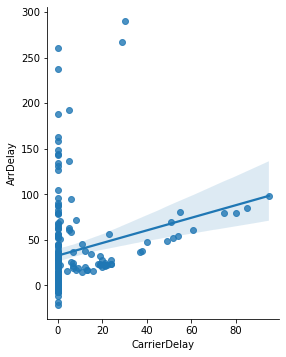

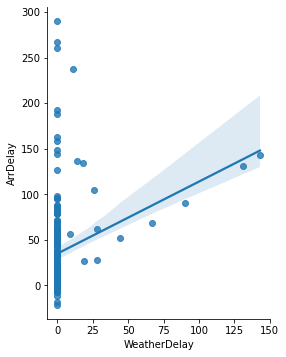

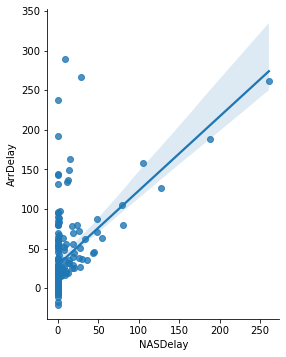

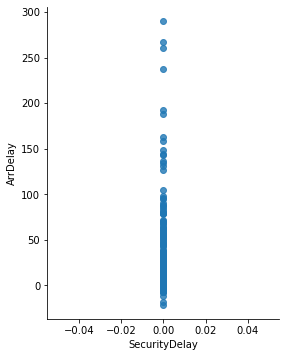

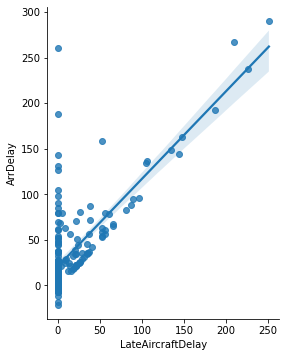

In [159]:
import seaborn as sns

for col in X.columns:
    sns.pairplot(df_flights, x_vars=[col], y_vars=["ArrDelay"], height=5, aspect=.8, kind="reg")

In [160]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()

**Decision tree**

In [161]:
from sklearn.tree import DecisionTreeRegressor

decisionTree = DecisionTreeRegressor(random_state=0)

**Random Forests**

In [162]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators = 1000, random_state = 42)

**Neural Network**

In [163]:
from sklearn.neural_network import MLPClassifier

neuralNetwork = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

## Exercici 2
Compara’ls en base al MSE i al R2

**R2**

In [164]:
from sklearn.metrics import r2_score

linearRegression_model = linearRegression.fit(X,y)
y_true = y
y_pred = linearRegression_model.predict(X)
print("Linear Regression:", round(r2_score(y_true, y_pred),2))

decisionTree_model = decisionTree.fit(X,y)
y_true = y
y_pred = decisionTree_model.predict(X)
print("Decision Tree:", round(r2_score(y_true, y_pred),2))

randomForest_model = randomForest.fit(X,y)
y_true = y
y_pred = randomForest_model.predict(X)
print("Random Forest:", round(r2_score(y_true, y_pred),2))

neuralNetwork_model = neuralNetwork.fit(X,y)
y_true = y
y_pred = neuralNetwork_model.predict(X)
print("Neural Network:", round(r2_score(y_true, y_pred),2))

Linear Regression: 1.0
Decision Tree: 1.0
Random Forest: 0.99
Neural Network: -2.74


R2 indica el porcentaje de la varianza de la variable dependiente respecto a la media, ArrDelay, que se explica por el modelo lineal. Según R2, Linear Regression, Decision Tree y Random Forest son capaces de explicar todas las variaciones de ArrDelay, y son óptimos. Sin embargo, la puntuación de Neural Network, al ser un valor negativo, indica que es un modelo muy deficiente para predicir estas variaciones.

**MSE**

In [165]:
from sklearn.metrics import mean_squared_error

linearRegression_model = linearRegression.fit(X,y)
y_true = y
y_pred = linearRegression_model.predict(X)
print("Linear Regression:", round(mean_squared_error(y_true, y_pred),2))

decisionTree_model = decisionTree.fit(X,y)
y_true = y
y_pred = decisionTree_model.predict(X)
print("Decision Tree:", round(mean_squared_error(y_true, y_pred),2))

randomForest_model = randomForest.fit(X,y)
y_true = y
y_pred = randomForest.predict(X)
print("Random Forest:", round(mean_squared_error(y_true, y_pred),2))

neuralNetwork_model = neuralNetwork.fit(X,y)
y_true = y
y_pred = neuralNetwork_model.predict(X)
print("Neural Network:", round(mean_squared_error(y_true, y_pred),2))

Linear Regression: 0.0
Decision Tree: 0.0
Random Forest: 23.12
Neural Network: 2703.0


El MSE mide la cantidad de error acumulado en los modelos. Evalúa la diferencia cuadrática promedio entre los valores observados y predichos. Cuando un modelo no tiene error, el MSE es igual a cero. A medida que aumenta el error del modelo, aumenta su valor.
Por tanto, según el MSE Decision Tree es un modelo perfecto. Linear Regression también sería un modelo prácticamente perfecto al tener un valor muy cercano a 0. Por otro lado, los otros modelos presentan un error bastante mayor; Random Forest, con 23.12, y Neural Network, con un valor descomunal.

## Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten

In [166]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

linearRegression_model = linearRegression.fit(x_train,y_train)

decisionTree_model = decisionTree.fit(x_train,y_train)

randomForest_model = randomForest.fit(x_train,y_train)

neuralNetwork_model = neuralNetwork.fit(x_train,y_train)

## Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

In [167]:
print("Linear Regression")
score = linearRegression_model.score(x_test,y_test)
print("Train/Test:", score)
score = linearRegression_model.score(X,y)
print("Validacio interna:", score)

print("\n\nDecision Tree")
score = decisionTree_model.score(x_test,y_test)
print("Train/Test:", score)
score = decisionTree_model.score(X,y)
print("Validacio interna:", score)

print("\n\nRandom Forest")
score = randomForest_model.score(x_test,y_test)
print("Train/Test:", score)
score = randomForest_model.score(X,y)
print("Validacio interna:", score)

print("\n\nNeural Network")
score = neuralNetwork_model.score(x_test,y_test)
print("Train/Test:", score)
score = neuralNetwork_model.score(X,y)
print("Validacio interna:", score)

Linear Regression
Train/Test: 1.0
Validacio interna: 1.0


Decision Tree
Train/Test: 0.764394117069279
Validacio interna: 0.9712778569003618


Random Forest
Train/Test: 0.9261928582648281
Validacio interna: 0.9825461248594523


Neural Network
Train/Test: 0.0
Validacio interna: 0.005025125628140704


## Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [168]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(RobustScaler(), LinearRegression())
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))
print(pipe.predict(X_test))

-0.3988434848324689
[ 35.60447356  22.263617    38.0260948   40.31049512  26.70648645
  61.74207603  38.69343139  50.25119066  22.12757203  38.79838813
  39.76847431  30.30411651  27.47909142  41.40591784  51.42307609
  36.93772768  29.19879104   9.25909749  58.50479871  28.42638293
  24.78659317  34.09450737  49.08274369  30.38481174  41.32268535
  29.2640481   20.42474523  19.58187642  26.21320561  74.46676631
 -37.57426517  56.9457255   40.70546165  41.9753983   81.10183442
  34.14848106  35.97297334  24.93011682  45.09214379  31.6299576 ]


In [169]:
pipe = make_pipeline(RobustScaler(), DecisionTreeRegressor(random_state=0))
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

-4.965950844613895

In [170]:
pipe = make_pipeline(RobustScaler(), RandomForestRegressor(n_estimators = 1000, random_state = 42))
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

-0.6462317636564454

In [171]:
pipe = make_pipeline(RobustScaler(), MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500))
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.05

Gracias al proceso de escalado de varibles teniendo en cuenta los outliers, el rendimiento se ha mantenido prácticamente igual para Linear Regression, y ha mejorado para los demás modelos.

## Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions

In [172]:
df_flights.drop(columns=['DepDelay'],inplace=True)
display(df_flights)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,Distance,Cancelled,...,CRSElapsedTime,AirTime,ArrDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
595091,1860421,2008,4,24,4,1940,2055,1222,737,0,...,135.0,110.0,9.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
699277,2286689,2008,4,24,4,620,1150,1242,1438,0,...,210.0,169.0,-3.0,18.0,13.0,0.0,0.0,0.0,0.0,0.0
513280,1606537,2008,3,6,4,1911,2105,207,1927,0,...,294.0,256.0,13.0,9.0,20.0,0.0,0.0,0.0,0.0,0.0
555111,1738057,2008,3,24,1,1910,2150,578,989,0,...,160.0,135.0,11.0,6.0,14.0,0.0,0.0,0.0,0.0,0.0
1269142,4241417,2008,8,5,2,1015,1310,2456,1142,0,...,175.0,161.0,19.0,6.0,8.0,0.0,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557695,1745579,2008,3,27,4,1335,1430,241,140,0,...,55.0,31.0,10.0,5.0,23.0,0.0,0.0,0.0,0.0,0.0
276020,880995,2008,2,27,3,2005,2133,1007,366,0,...,88.0,62.0,21.0,7.0,29.0,7.0,0.0,10.0,0.0,4.0
563219,1759290,2008,3,10,1,1720,1912,1197,200,0,...,112.0,49.0,36.0,8.0,24.0,0.0,0.0,36.0,0.0,0.0
103961,333548,2008,1,17,4,1004,1031,4491,247,0,...,87.0,61.0,22.0,2.0,25.0,21.0,0.0,1.0,0.0,0.0


In [175]:
X_train,X_test,y_train,y_test = train_test_split(df_flights.drop(columns=['ArrDelay']), df_flights['ArrDelay'], test_size=0.2, random_state=42)

"""linearRegression_model = linearRegression.fit(x_train,y_train)
predictions = linearRegression_model.predict(x_test)
print("Linear Regression", predictions, sep = "\n")

decisionTree_model = decisionTree.fit(x_train,y_train)
predictions = decisionTree_model.predict(x_test)
print("Decision Tree", predictions, sep = "\n")

randomForest_model = randomForest.fit(x_train,y_train)
predictions = randomForest_model.predict(x_test)
print("Random Forest", predictions, sep = "\n")

neuralNetwork_model = neuralNetwork.fit(x_train,y_train)
predictions = neuralNetwork_model.predict(x_test)
print("Neural Network", predictions, sep = "\n")"""

pipe = make_pipeline(RobustScaler(), LinearRegression())
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
print("Linear Regression", predictions, sep = "\n")

pipe = make_pipeline(RobustScaler(), RandomForestRegressor(n_estimators = 1000, random_state = 42))
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
print("Random Forest", predictions, sep = "\n")

pipe = make_pipeline(RobustScaler(), DecisionTreeRegressor(random_state=0))
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
print("Decision Tree", predictions, sep = "\n")

pipe = make_pipeline(RobustScaler(), MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500))
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)
print("Neural Network", predictions, sep = "\n")

Linear Regression
[ 63.31893788   3.2303701   64.86761717  23.62079265   6.71836905
 127.15343473  22.53876078  36.27214794  26.98465679  19.40768963
  57.40518909  10.79422173  29.40578087   1.66477318  27.91798004
  37.12292592  51.69640655   3.34632695   5.56566677  27.23975913
  46.50139399  46.10983944   2.20310104  36.21287739  21.80018477
  20.46750197  24.37896292  -2.44527144   1.68040172  16.22423058
  -6.461205    92.99148559   4.6035212  148.40357731  17.91575739
  46.76742476  76.77838634   0.34473502  28.3651484   53.80635886]
Random Forest
[ 62.02    3.607  68.199  24.543   2.842 123.969  25.171  32.767  29.955
  26.067  71.225   9.005  24.632   1.24   28.208  29.196  56.981   4.36
   1.927  43.115  36.384  54.998  12.846  35.696  27.61   25.17   24.97
   2.887   5.743  25.953   2.023  91.823   4.716 157.894  23.709  47.574
  53.288   4.802  28.825  64.974]
Decision Tree
[ 80.   3.  63.  28.   7. 158.  17.  36.  22.  24.  59.   0.  25.   6.
  21.  19.  48.   3.  11.  26.

/Users/claradv/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
